# PARTE A
cercare le onde stazionarie di una corda di lunghezza fissa (L = 1m), in seguito ripetere variando la tensione

In [3]:
import numpy as np
import pandas as pd
from typing import Final
import os

dir_path = os.path.abspath('')
FILE = dir_path + '/../CSV/' + 'misurazione1_2.csv' # la prima misurazione il peso toccava il banco

AMPIEZZA : Final = 5 # Volt ampiezza dell'oscillazione
L: Final = 1 # m

fr = pd.read_csv(FILE, sep = ';')  # fileread

masse = np.array(fr['massa']) * 0.001 #Kg
f1 = np.array(fr['f1']) #Hz float per evitare errori nella stima della covarianza di curve_fit
f2 = np.array(fr['f2'])
f3 = np.array(fr['f3'])
f4 = np.array(fr['f4'])

n_armonica = np.array([1,2,3,4]) # armoniche instaurate
ERRORE_SENSIBILITA_OSCILLOSCOPIO: Final = 2.0 # Hz


/usr/lib/python3/dist-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


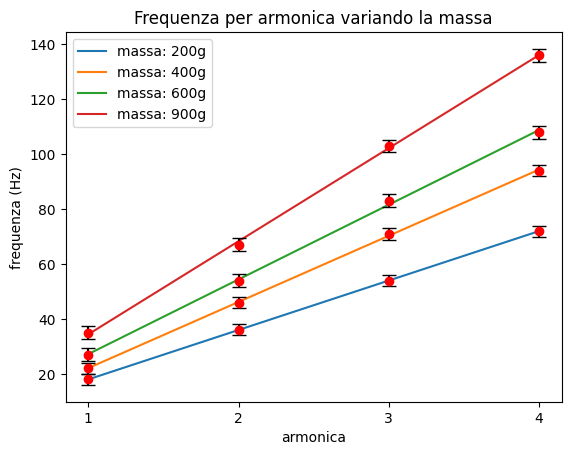

0.0
0.005
0.0172
0.0208


In [4]:
from interpolazione3 import RettaInterpolata
import matplotlib.pyplot as plt

r_interpolate = []

for i in range(0,len(masse)):
    f = np.array([f1[i],f2[i],f3[i],f4[i]])
    r = RettaInterpolata(n_armonica,f,ERRORE_SENSIBILITA_OSCILLOSCOPIO)
    r_interpolate.append(r)
    plt.plot(r.x_best,r.y_best,label=f"massa: {int(masse[i]*1000)}g")
    plt.errorbar(n_armonica,f,yerr=r.sigmaY,fmt='o', ecolor='black', color="red", capsize=5)
    r = None

plt.title("Frequenza per armonica variando la massa")
plt.xlabel("armonica")
plt.ylabel("frequenza (Hz)")
plt.xticks(n_armonica)
plt.legend()
plt.show()

for i in r_interpolate:
    print(i.rchisquare)